In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
dataset_name = 'CICIDS_2017'
models = ['LR', 'GB', 'NN']
individual_methods = ['chi2', 'ANOVA', 'mutualinfo', 'sfs(gb)', 'sfs(lr)', 'im(gb)', 'im(lr)']
set_methods = ['union', 'intersection', 'quorum']
cv_columns = ['MD_score', 'MPR_score', 'MS_score']
test_columns = ['MD_test', 'MPR_test', 'MS_test']
size_columns = ['MD_size', 'MPR_size', 'MS_size']
stopping_methods = ['MaxDelta', 'MinPerfReq', 'MaxScore']
full_feature_cv = [0.6621734891820216, 0.9960524788520967, 0.9648877597550667]
full_feature_test = [0.6610223438793049, 0.9959611530753815, 0.9671735773284924]

# Load Data

In [4]:
cv = pd.DataFrame(columns=[cv_columns])
test = pd.DataFrame(columns=[test_columns])
size = pd.DataFrame(columns=[size_columns])
df = pd.read_csv(os.path.join('../Results/', dataset_name, 'Greedy_Stopping_Point.csv'), index_col=0)

for index in df.index:
    cv.loc[index] = df.loc[index][cv_columns].tolist()
    test.loc[index] = df.loc[index][test_columns].tolist()
    size.loc[index] = df.loc[index][size_columns].tolist()

In [5]:
df = pd.read_csv(os.path.join('../Results/', dataset_name, 'Set_Stopping_Point.csv'), index_col=0)

for index in df.index:
    cv.loc[index] = df.loc[index][cv_columns].tolist()
    test.loc[index] = df.loc[index][test_columns].tolist()
    size.loc[index] = df.loc[index][size_columns].tolist()

In [6]:
df = pd.read_csv(os.path.join('../Results/', dataset_name, 'Individual_Stopping_Point.csv'), index_col=0)

for index in df.index:
    cv.loc[index] = df.loc[index][cv_columns].tolist()
    test.loc[index] = df.loc[index][test_columns].tolist()
    size.loc[index] = df.loc[index][size_columns].tolist()

# Plot

In [7]:
WIDTH = 0.25
xticks = ['greedy'] + set_methods + individual_methods

<Figure size 640x480 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

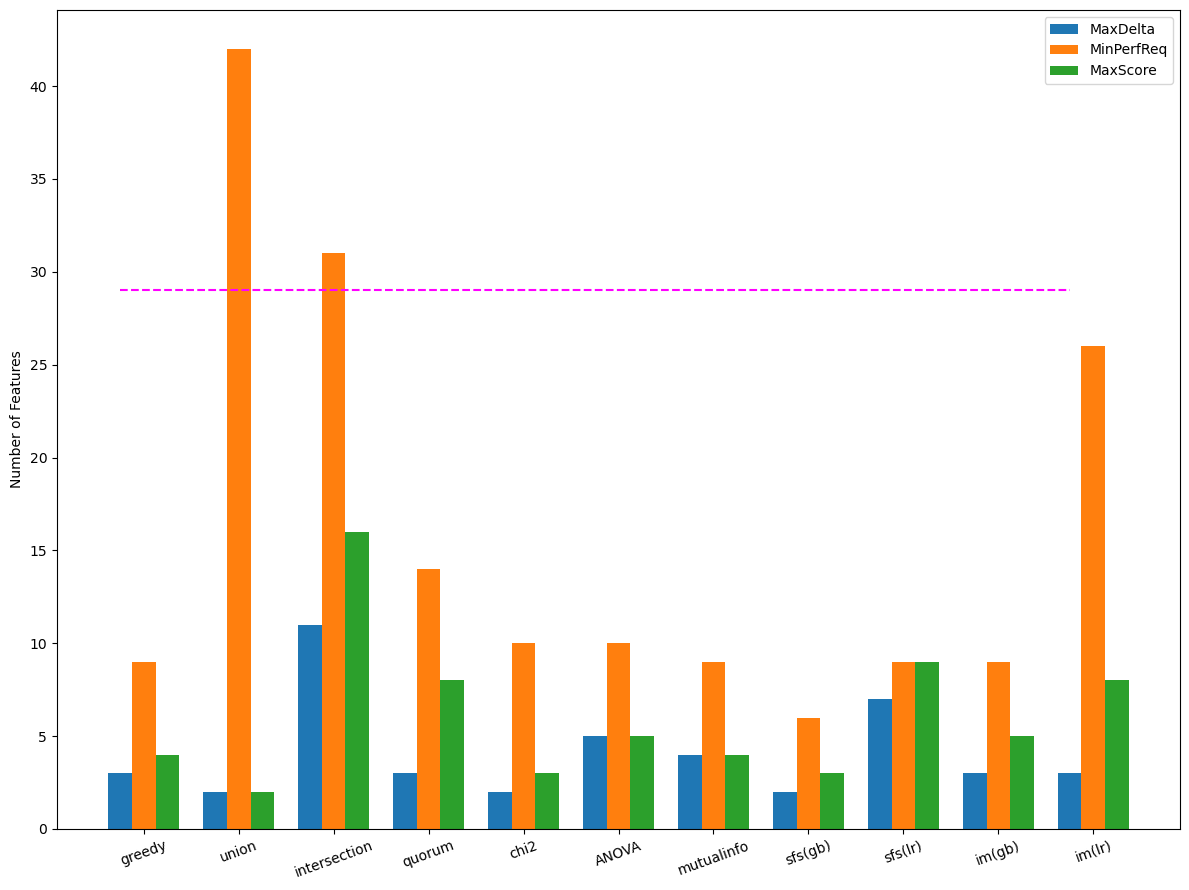

In [8]:
for model in models:
    cv_ = cv[cv.index.str.endswith(model)].copy()
    n = len(cv_)
    test_ = test[test.index.str.endswith(model)].copy()
    size_ = size[size.index.str.endswith(model)].copy()
    # cv score
    plt.clf()
    plt.figure(figsize=(12, 9))
    plt.bar(x=range(n), height=cv_['MD_score'].values.reshape(n), width=WIDTH, label=stopping_methods[0])
    plt.bar(x=[x+WIDTH for x in range(n)], height=cv_['MPR_score'].values.reshape(n), width=WIDTH, label=stopping_methods[1])
    plt.bar(x=[x+WIDTH*2 for x in range(n)], height=cv_['MS_score'].values.reshape(n), width=WIDTH, label=stopping_methods[2])

    plt.xticks([x+WIDTH for x in range(n)], xticks)
    plt.xticks(rotation=20)
    plt.ylabel('F1 Score')
    plt.plot(full_feature_cv[0])
    plt.plot(range(n), [full_feature_cv[0] for _ in range(n)], color='magenta', linestyle='--')

    plt.legend()
    plt.tight_layout()
    plt.savefig('../Evaluation/' + dataset_name + '/Compare_CV_F1_' + model + '.png')
    # test score
    plt.clf()
    plt.figure(figsize=(12, 9))
    plt.bar(x=range(n), height=test_['MD_test'].values.reshape(n), width=WIDTH, label=stopping_methods[0])
    plt.bar(x=[x+WIDTH for x in range(n)], height=test_['MPR_test'].values.reshape(n), width=WIDTH, label=stopping_methods[1])
    plt.bar(x=[x+WIDTH*2 for x in range(n)], height=test_['MS_test'].values.reshape(n), width=WIDTH, label=stopping_methods[2])

    plt.xticks([x+WIDTH for x in range(n)], xticks)
    plt.xticks(rotation=20)
    plt.ylabel('F1 Score')
    plt.plot(full_feature_test[0])
    plt.plot(range(n), [full_feature_test[0] for _ in range(n)], color='magenta', linestyle='--')

    plt.legend()
    plt.tight_layout()
    plt.savefig('../Evaluation/' + dataset_name + '/Compare_Test_F1_' + model + '.png')
    # feature size
    plt.clf()
    plt.figure(figsize=(12, 9))
    plt.bar(x=range(n), height=size_['MD_size'].values.reshape(n), width=WIDTH, label=stopping_methods[0])
    plt.bar(x=[x+WIDTH for x in range(n)], height=size_['MPR_size'].values.reshape(n), width=WIDTH, label=stopping_methods[1])
    plt.bar(x=[x+WIDTH*2 for x in range(n)], height=size_['MS_size'].values.reshape(n), width=WIDTH, label=stopping_methods[2])

    plt.xticks([x+WIDTH for x in range(n)], xticks)
    plt.xticks(rotation=20)
    plt.ylabel('Number of Features')
    plt.plot(range(n), [29 for _ in range(n)], color='magenta', linestyle='--')

    plt.legend()
    plt.tight_layout()
    plt.savefig('../Evaluation/' + dataset_name + '/Compare_Size_' + model + '.png')

<Figure size 1200x900 with 0 Axes>

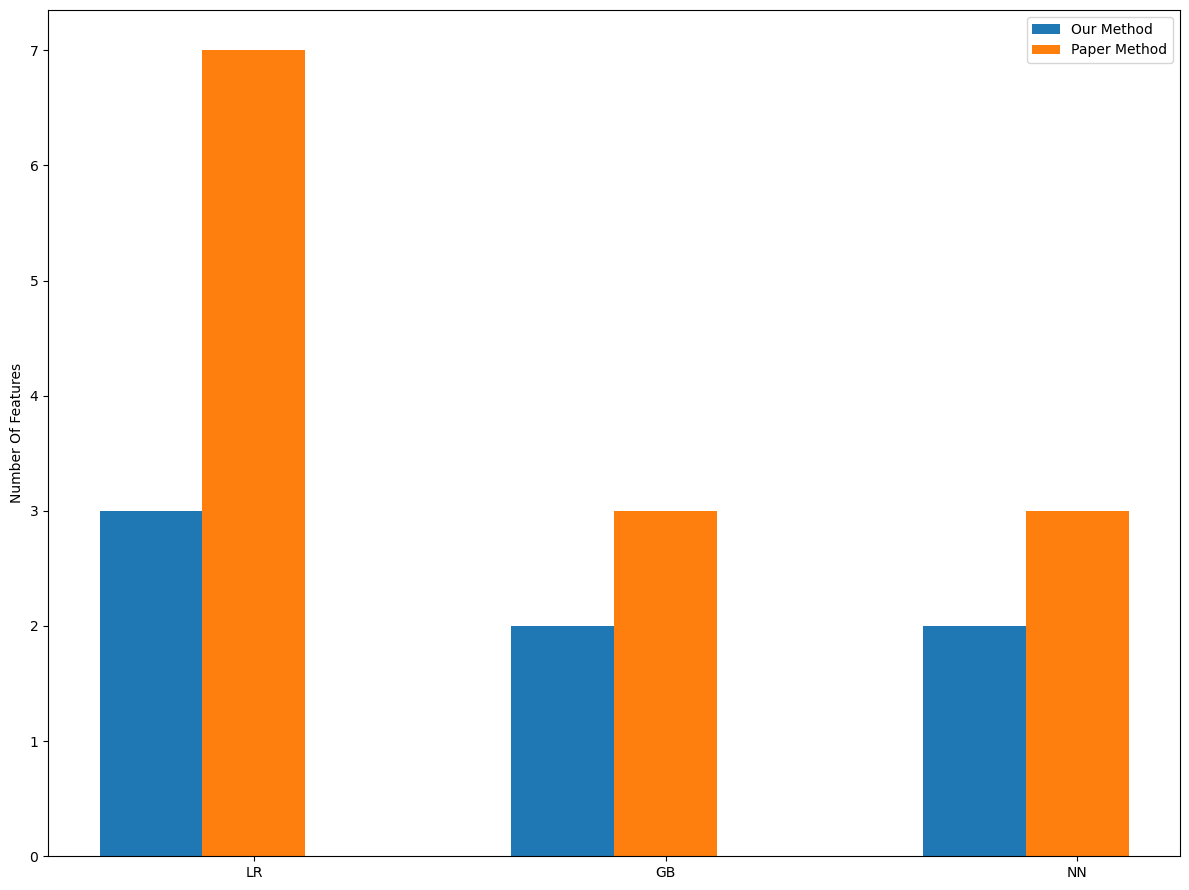

In [12]:
test1 = [0.7607549889634668, 0.6265972550875533, 0.6207844381012793]
size1 = [3, 2, 2]
test2 = [0.762461453491048, 0.6897473855116758, 0.6827959564988262]
size2 = [7, 3, 3]
plt.figure(figsize=(12, 9))
plt.bar(range(3), test1, width=WIDTH, label='Our Method')
plt.bar([x+WIDTH for x in range(3)], test2, width=WIDTH, label='Paper Method')
plt.xticks([x+0.25 for x in range(3)], models)
plt.ylabel('Test Score')
plt.legend()
plt.tight_layout()
plt.savefig('../Evaluation/Compare_F1_NSL_KDD.png')
plt.clf()
plt.figure(figsize=(12, 9))
plt.bar(range(3), size1, width=WIDTH, label='Our Method')
plt.bar([x+WIDTH for x in range(3)], size2, width=WIDTH, label='Paper Method')
plt.xticks([x+0.25 for x in range(3)], models)
plt.ylabel('Number Of Features')
plt.legend()
plt.tight_layout()
plt.savefig('../Evaluation/Compare_Size_NSL_KDD.png')